In [7]:
# !pip install pandas
import pandas as pd
import os

In [8]:
file_dir = "./rosdata/MPC/Init_angle_1.5707963267948966_seed_1_Nactor_4"
fn = os.listdir(file_dir)
fn = sorted(fn, key=lambda x: int(x.split(".")[0]))[-1]

file_path = os.path.join(
    file_dir,
    fn
)
with open(file_path) as f:
    data = f.read().splitlines()[20:]

data
fn

'1720701968.288752__3wrobotNI__MPC__2024-07-11__14h46m08s__run01.csv'

In [9]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
df

,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]
0,1902.590,-1.002374,2.997037,-1.562041,94.279064,18.855813,0.220000,0.949361
1,1902.667,-1.002374,2.997037,-1.562041,94.279189,37.711651,0.220000,0.949361
2,1902.677,-1.002374,2.997037,-1.562041,94.279189,56.567488,0.220000,0.949361
3,1902.687,-1.002374,2.997040,-1.562039,94.279317,75.423352,0.220000,0.949361
4,1902.697,-1.002374,2.997040,-1.562039,94.279317,94.279215,0.220000,0.949361
...,...,...,...,...,...,...,...,...
1415,1922.332,-0.211102,0.022821,2.441476,6.055144,11309.972415,-0.034494,-1.469812
1416,1922.342,-0.211102,0.022821,2.441476,6.055144,11311.183444,-0.034494,-1.469812
1417,1922.352,-0.210174,0.022032,2.431754,6.006626,11312.384769,-0.034494,-1.469812
1418,1922.362,-0.210174,0.022032,2.431754,6.006626,11313.586094,-0.034494,-1.469812


<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

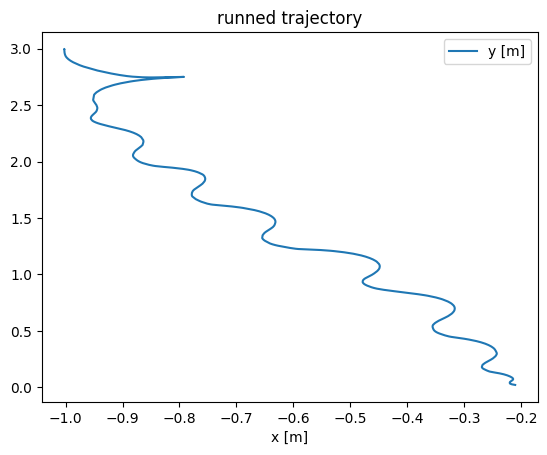

In [10]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

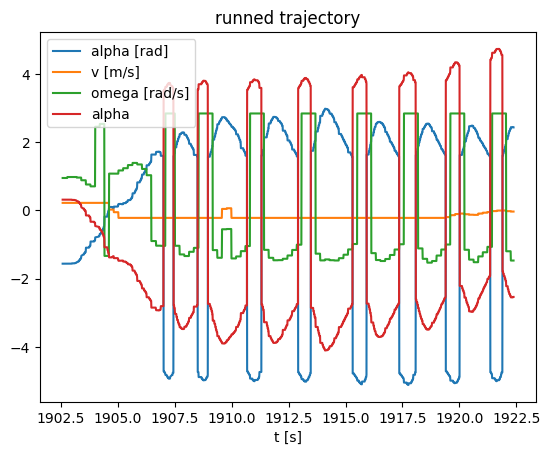

In [11]:
import numpy as np

df["alpha"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha"], title="runned trajectory")

<Axes: title={'center': 'object'}, xlabel='t [s]'>

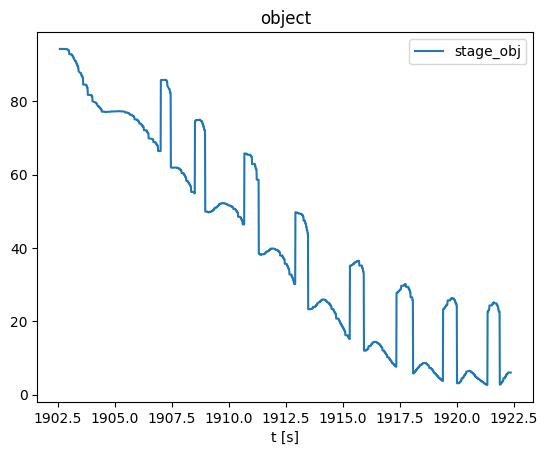

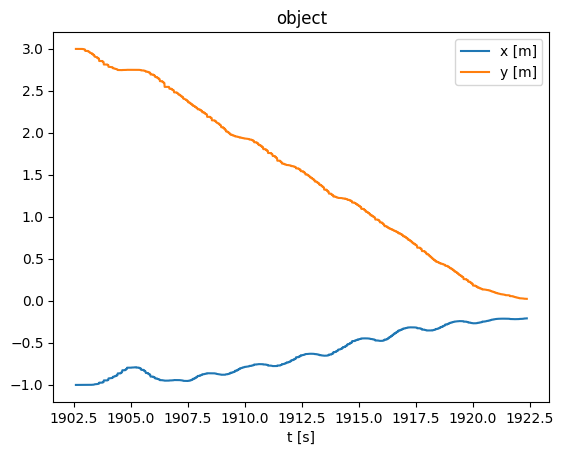

In [12]:
df
df.plot(x="t [s]", y=["stage_obj"], title="object")
df.plot(x="t [s]", y=["x [m]", "y [m]"], title="object")